In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df=pd.read_csv("train_data.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTIPON'])
print(train_df.head())

<ipython-input-3-ed803d7ee2dc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df=pd.read_csv("train_data.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTIPON'])


     ID                                              TITLE          GENRE  \
0  "15                         The Glass Menagerie (1973)          drama    
1  "16                                  Night Call (2016)          drama    
2  "17                               Babylon Vista (2001)         comedy    
3  "18    ""Wo Grafen schlafen - Eine Schlösser-Reise""...   documentary    
4  "19                         ""Roller Warriors"" (2009)          sport    

                                        DESCRIPTIPON  
0   Amanda Wingfield dominates her children with ...  
1   Simon's world is turned upside down when his ...  
2   Frankie Reno was a child star on a TV show. B...  
3   The story of the Castle and Family of Norbert...  
4   Modern roller derby began in Austin, TX in 20...  


In [ ]:
test_df=pd.read_csv("test_data.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
print(test_df.head())

<ipython-input-4-175716edad5c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df=pd.read_csv("test_data.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])


    ID                          TITLE  \
0  "1           Edgar's Lunch (1998)    
1  "2       La guerra de papá (1977)    
2  "3    Off the Beaten Track (2010)    
3  "4         Meu Amigo Hindu (2015)    
4  "5              Er nu zhai (1955)    

                                               GENRE  DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...          NaN  
1   Spain, March 1964: Quico is a very naughty ch...          NaN  
2   One year in the life of Albin and his family ...          NaN  
3   His father has died, he hasn't spoken with hi...          NaN  
4   Before he was known internationally as a mart...          NaN  


In [ ]:
test_solution_df=pd.read_csv("test_data_solution.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
print(test_solution_df.head())

<ipython-input-5-0a7e81e734e8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_df=pd.read_csv("test_data_solution.csv",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])


    ID                          TITLE          GENRE  \
0  "1           Edgar's Lunch (1998)       thriller    
1  "2       La guerra de papá (1977)         comedy    
2  "3    Off the Beaten Track (2010)    documentary    
3  "4         Meu Amigo Hindu (2015)          drama    
4  "5              Er nu zhai (1955)          drama    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


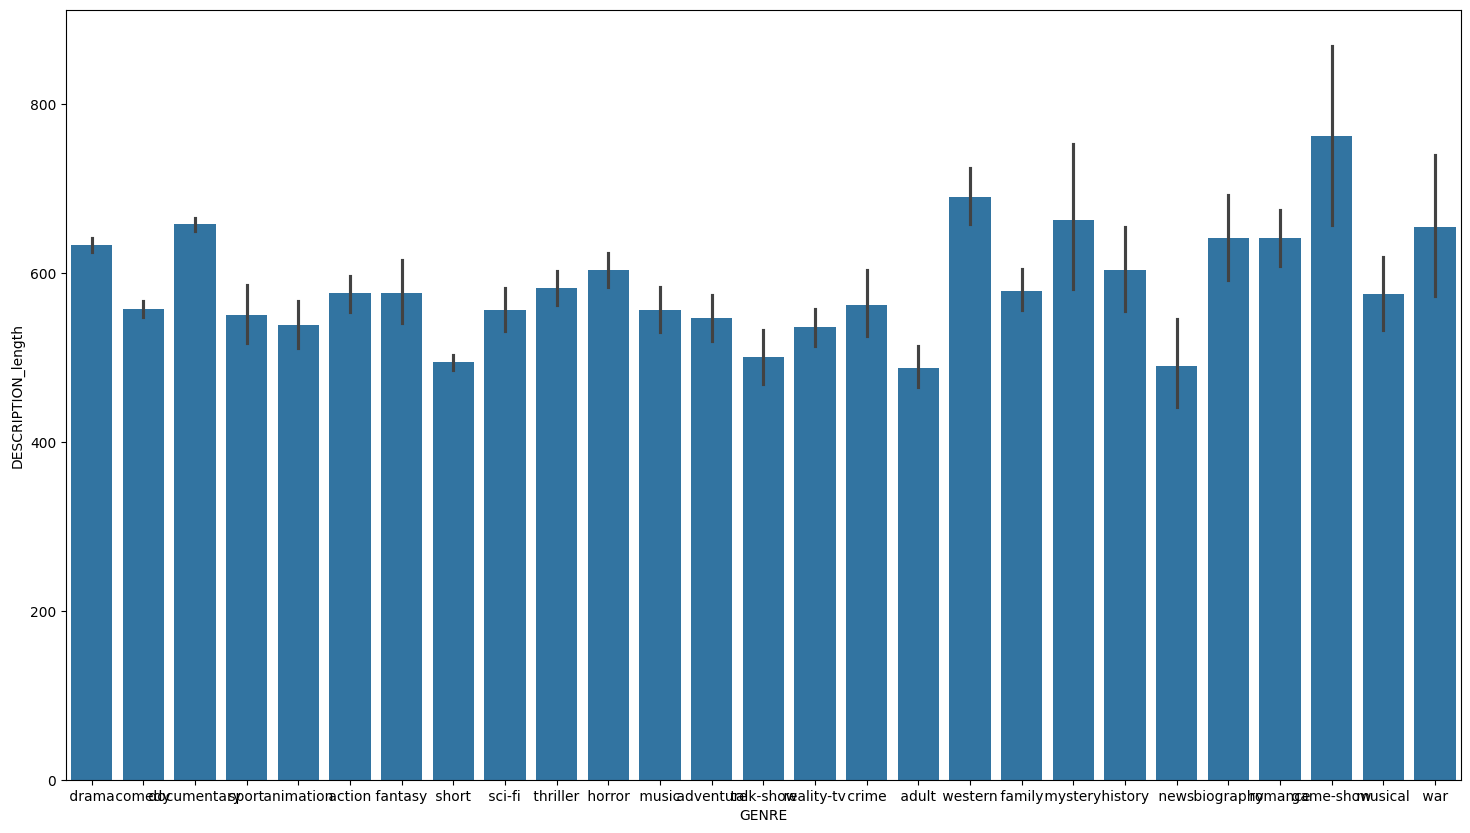

In [ ]:
pyplot.figure(figsize=(18,10))
train_df['DESCRIPTION_length']=train_df["DESCRIPTIPON"].apply(len)
sns.barplot(x='GENRE',y='DESCRIPTION_length',data=train_df)
pyplot.show()

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(test_solution_df.shape)

(54200, 5)
(54200, 4)
(54200, 4)


In [ ]:
train_df.isnull().count()
test_df.isnull().count()
test_solution_df.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_df['DESCRIPTIPON'].fillna("", inplace=True)
test_df['DESCRIPTION'].fillna("", inplace=True)
tf=TfidfVectorizer(stop_words="english",max_features=500000)
X_train=tf.fit_transform(train_df['DESCRIPTIPON'])
X_test=tf.transform(test_df['DESCRIPTION'])
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(train_df['GENRE'])
Y_test = label_encoder.transform(test_solution_df['GENRE'])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
svc = LinearSVC()
svc.fit(x_train, y_train)
y_test_pred = svc.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.5797047970479705
Test Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.34      0.38       273
           1       0.67      0.41      0.51       137
           2       0.43      0.18      0.25       156
           3       0.39      0.15      0.22       101
           4       0.00      0.00      0.00        41
           5       0.52      0.57      0.55      1426
           6       0.36      0.05      0.09       103
           7       0.70      0.83      0.76      2637
           8       0.55      0.72      0.62      2719
           9       0.43      0.14      0.22       152
          10       0.23      0.04      0.07        68
          11       0.86      0.66      0.75        38
          12       0.00      0.00      0.00        43
          13       0.62      0.61      0.62       461
          14       0.59      0.45      0.51       145
          15       0.00      0.00      0.00        63
          16      

In [ ]:
y_pred = svc.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5797047970479705
Test Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.34      0.38       273
           1       0.67      0.41      0.51       137
           2       0.43      0.18      0.25       156
           3       0.39      0.15      0.22       101
           4       0.00      0.00      0.00        41
           5       0.52      0.57      0.55      1426
           6       0.36      0.05      0.09       103
           7       0.70      0.83      0.76      2637
           8       0.55      0.72      0.62      2719
           9       0.43      0.14      0.22       152
          10       0.23      0.04      0.07        68
          11       0.86      0.66      0.75        38
          12       0.00      0.00      0.00        43
          13       0.62      0.61      0.62       461
          14       0.59      0.45      0.51       145
          15       0.00      0.00      0.00        63
          16      

In [22]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [23]:
Y_test.reshape(-1,1)

array([[24],
       [ 5],
       [ 7],
       ...,
       [ 1],
       [ 8],
       [ 8]])

In [24]:
MNB.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [25]:
y_pred = MNB.predict(X_test)
probabilities = MNB.predict_proba(X_test)
print(probabilities)

[[0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]
 [0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]
 [0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]
 ...
 [0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]
 [0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]
 [0.02426199 0.01086716 0.01429889 ... 0.02931734 0.00243542 0.01904059]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression(max_iter=1000)
lgc.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
lgc.predict(x_test)

array([7, 5, 7, ..., 5, 1, 7])

In [20]:
y_pred = lgc.predict(x_test)
probabilities1 = lgc.predict_proba(x_test)
print(probabilities1)

[[0.00357942 0.00230659 0.00583014 ... 0.00688942 0.00089832 0.00246234]
 [0.01238187 0.04855702 0.01358481 ... 0.01550995 0.00168008 0.01418484]
 [0.01122392 0.00805922 0.01014114 ... 0.02188531 0.00237696 0.01586435]
 ...
 [0.02074244 0.01622792 0.01331619 ... 0.01976414 0.00219145 0.01265173]
 [0.01926998 0.27613603 0.01607375 ... 0.02486214 0.00244446 0.01042589]
 [0.0100955  0.00692763 0.00762652 ... 0.01076593 0.00174281 0.00734898]]


In [18]:
def predict_movie(description):
    tf1 = tf.transform([description])
    pred_label = svc.predict(tf1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where a family relations are disturbed "
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where rich guy loves a poor girl and convenice the family for marrige"
print(predict_movie(sample_descr_for_movie1))

 comedy 
 drama 
